In [6]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 1.3 MB/s eta 0:00:00 MB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 9.5 MB/s eta 0:00:00m eta 0:00:010:0101
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.7/310.7 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 18.9 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.5 MB/s eta 0:00:00m eta 0:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 29.5 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 30.5 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 13.3 MB/s eta 0:00:00


------------ [ ARQUIVO : casoG50.txt ] ------------
Posição inicial:  (0, 38)
Soma dos números encontrados fora de ordem:  892
Soma dos números encontrados:  14111
Quantidade total de passos realizados:  1303
Tempo decorrido para realizar o caminho e gerar os resultados:   0.00078 segundos

-----------------------------------------------------------

------------ [ ARQUIVO : casoG100.txt ] ------------
Posição inicial:  (0, 100)
Soma dos números encontrados fora de ordem:  3136
Soma dos números encontrados:  25411
Quantidade total de passos realizados:  5064
Tempo decorrido para realizar o caminho e gerar os resultados:   0.00283 segundos

-----------------------------------------------------------

------------ [ ARQUIVO : casoG200.txt ] ------------
Posição inicial:  (0, 92)
Soma dos números encontrados fora de ordem:  12458
Soma dos números encontrados:  73424
Quantidade total de passos realizados:  19917
Tempo decorrido para realizar o caminho e gerar os resultados:   0.01167 segun

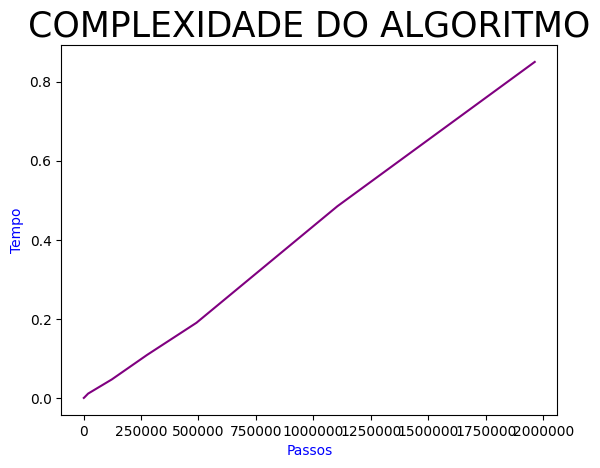

In [10]:
import time
import matplotlib.pyplot as plt

#função principal que faz o caminho e soma na ordem
def calcular_soma_numeros(p_inicial, conteudo):
    coluna_at, linha_at = p_inicial
    direcao = (0, 1)
    total = 0
    linhas = conteudo.strip().split('\n')
    passos = 0

    while True:
        if linha_at < 0 or linha_at >= len(linhas) or coluna_at < 0 or coluna_at >= len(linhas[linha_at]):
            break
        char = linhas[linha_at][coluna_at] #define o caracter atual
        passos += 1

        if char == '#':  #finaliza quando achar o fim
            break

        elif char == '-' or char == '|': #continua na mesma direção
            linha_at += direcao[0]
            coluna_at += direcao[1]

        elif char == '/': 
            if direcao == (-1, 0):  
                direcao = (0, 1)  
            elif direcao == (1, 0): 
                direcao = (0, -1)  
            elif direcao == (0, 1):  
                direcao = (-1, 0)  
            elif direcao == (0, -1):  
                direcao = (1, 0)  
            linha_at += direcao[0]
            coluna_at += direcao[1]

        elif char == '\\': 
            if direcao == (-1, 0):  
                direcao = (0, -1)  
            elif direcao == (1, 0):  
                direcao = (0, 1) 
            elif direcao == (0, 1):
                direcao = (1, 0)  
            elif direcao == (0, -1):  
                direcao = (-1, 0) 
            linha_at += direcao[0]
            coluna_at += direcao[1]
            
        elif char.isdigit():
            num = ''
            while char.isdigit():
                num += char
                linha_at += direcao[0]
                coluna_at += direcao[1]
                if 0 <= linha_at < len(linhas) and 0 <= coluna_at < len(linhas[linha_at]):
                    char = linhas[linha_at][coluna_at]
                else:
                    break
            total += int(num)

    return total, passos 

#realiza a soma dos números fora de ordem (apenas somando todos os presentes no arquivo)
def soma_fora_ordem(arquivo):
    soma = 0
    primeira_linha = True
    
    for linha in arquivo:
        if primeira_linha:
            primeira_linha = False
            continue
        linha = linha.strip()
        for char in linha:
            if char.isdigit():
                soma += int(char)
    return soma

#método que encontra a posição inicial do arquivo
def encontra_inicial(conteudo):
    linhas = conteudo.strip().split('\n')
    for y, linha in enumerate(linhas):
        if linha.strip() and linha.strip()[0] == '-':
            return (0, y)
    return None

#função para printar o resultado
def printa_resultado(p_inicial, conteudo, nome):
    indice = nome.rfind('/')
    nome_arquivo = nome[indice + 1:]
    if p_inicial:
        print(f"------------ [ ARQUIVO : {nome_arquivo} ] ------------")

        print("Posição inicial: ", p_inicial)

        soma_n_ordenada = soma_fora_ordem(conteudo)
        print("Soma dos números encontrados fora de ordem: ", soma_n_ordenada)

        start_time = time.time()

        soma, passos = calcular_soma_numeros(p_inicial, conteudo)
        print("Soma dos números encontrados: ", soma)

        end_time = time.time()
        tempo = end_time - start_time
        tempo_form = f"{tempo: .5f}"

        print("Quantidade total de passos realizados: ", passos)

        print("Tempo decorrido para realizar o caminho e gerar os resultados: ", tempo_form, "segundos")

        print("\n-----------------------------------------------------------\n")

        return tempo, passos
    else:
        print("Não foi possível encontrar a posição inicial no arquivo: ", nome_arquivo)

#função que lê o arquivo e chama outros métodos
def processa_arquivo(nome):
    with open(nome, 'r') as arquivo:
        conteudo = arquivo.read()
        if conteudo:
            p_inicial = encontra_inicial(conteudo)
            tempos, passos = printa_resultado(p_inicial, conteudo, nome)
            return tempos, passos

#função que plota o gráfico
def plota_grafico(tempos, passos):
    plt.plot(passos, tempos, color='purple')
    plt.title('COMPLEXIDADE DO ALGORITMO', loc='center', fontsize=25)
    plt.xlabel('Passos', color='blue')
    plt.ylabel('Tempo', color='blue')
    plt.ticklabel_format(style='plain', axis='both')
    plt.show()

#definição dos arquivos a serem lidos
nomes_arq = ['casos-cohen-noite/casoG50.txt', 'casos-cohen-noite/casoG100.txt', 'casos-cohen-noite/casoG200.txt', 'casos-cohen-noite/casoG500.txt', 
             'casos-cohen-noite/casoG750.txt', 'casos-cohen-noite/casoG1000.txt', 'casos-cohen-noite/casoG1500.txt', 'casos-cohen-noite/casoG2000.txt']

#main
tempos = []
passos = []

for nome in nomes_arq:
    tempo, passo = processa_arquivo(nome)
    tempos.append(tempo)
    passos.append(passo)

plota_grafico(tempos, passos)